In [65]:
import pandas as pd
import numpy as np
data = pd.read_csv('dataset.csv', index_col=0)
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Data exploration

In [2]:
data.shape

(148654, 12)

In [3]:
data.count()

EmployeeName        148654
JobTitle            148654
BasePay             148045
OvertimePay         148650
OtherPay            148650
Benefits            112491
TotalPay            148654
TotalPayBenefits    148654
Year                148654
Notes                    0
Agency              148654
Status                   0
dtype: int64

BasePay, overtimepay, otherpay, benefits have missing values 
<br>
Notes and Status have no value

In [4]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


The minimum value for pay is negative, which is odd

In [5]:
data.columns

Index(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [6]:
# look into categorical variables
data['JobTitle'].describe()

count               148654
unique                2159
top       Transit Operator
freq                  7036
Name: JobTitle, dtype: object

In [7]:
data['JobTitle'].unique()

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

In [8]:
data['Agency'].describe()

count            148654
unique                1
top       San Francisco
freq             148654
Name: Agency, dtype: object

All employees have the same Agency - San Francisco

In [9]:
# look into negative values - whether below to the same employee or different employees
data.loc[data['BasePay'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
72833,Irwin Sidharta,Junior Clerk,-166.01,249.02,0.0,6.56,83.01,89.57,2012,NaN,San Francisco,NaN
72866,Robert Scott,Junior Clerk,-121.63,182.70,0.0,5.44,61.07,66.51,2012,NaN,San Francisco,NaN
72873,Chung Huey Kung,Junior Clerk,-109.22,163.83,0.0,4.32,54.61,58.93,2012,NaN,San Francisco,NaN
72875,Jordan Li,Junior Clerk,-106.60,159.90,0.0,4.66,53.30,57.96,2012,NaN,San Francisco,NaN
72879,Richard Jackson,Junior Clerk,-101.88,153.08,0.0,4.55,51.20,55.75,2012,NaN,San Francisco,NaN
72885,DiMarco McGhee-Stewart,Junior Clerk,-93.14,139.97,0.0,4.17,46.83,51.00,2012,NaN,San Francisco,NaN
72889,Leopoldo Marasigan,Junior Clerk,-87.38,131.06,0.0,3.89,43.68,47.57,2012,NaN,San Francisco,NaN
72895,Douglas Avalos,Junior Clerk,-75.67,113.76,0.0,3.39,38.09,41.48,2012,NaN,San Francisco,NaN
72909,Norma Rodriguez,Junior Clerk,-59.59,89.65,0.0,2.68,30.06,32.74,2012,NaN,San Francisco,NaN


In [10]:
data.loc[data['OvertimePay'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
90715,Claudia M Sanchez,Senior Eligibility Worker,75033.03,-0.01,1540.0,28864.64,76573.02,105437.66,2013,NaN,San Francisco,NaN


In [11]:
data.loc[data['OtherPay'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
84970,Pei Meng,IS Business Analyst-Principal,101274.51,0.00,-7058.59,34583.40,94215.92,128799.32,2013,NaN,San Francisco,NaN
93201,Jose A Lemus,Custodial Supervisor,66744.00,2234.40,-9.60,26889.04,68968.80,95857.84,2013,NaN,San Francisco,NaN
96169,John G Alexander,Gardener,59733.32,46.76,-46.76,25863.91,59733.32,85597.23,2013,NaN,San Francisco,NaN
107185,Amelie E Bullard,Special Nurse,6932.50,0.00,-50.19,418.03,6882.31,7300.34,2013,NaN,San Francisco,NaN
148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [12]:
data.loc[data['Benefits'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN
110531,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
144100,Leticia Villacampa,Secretary 2,0.0,0.0,9991.77,-13.80,9991.77,9977.97,2014,NaN,San Francisco,NaN


In [13]:
data.loc[data['TotalPay'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [14]:
data.loc[data['TotalPayBenefits'] < 0]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,NaN,San Francisco,NaN
110531,David P Kucia,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,NaN,San Francisco,NaN
148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,NaN


Negative pay apprears for different employees across different pay types. 
<br>
These could cause due to error in data entry.

## Data cleaning

Filter out all rows with negative pay because inaccurate data might skew the results.
<br>
Not to replace with na or zero because exist values contains na and zero. Negative pay should be treated differently.

In [66]:
# create a copy of original data
original = data

# identity rows indices to exclude
e1 = data.loc[data['BasePay'] < 0].index
data = data.drop(e1)
e2 = data.loc[data['OvertimePay'] < 0].index
data = data.drop(e2)
e3 = data.loc[data['OtherPay'] < 0].index
data = data.drop(e3)
e4 = data.loc[data['Benefits'] < 0].index
data = data.drop(e4)
e5 = data.loc[data['TotalPay'] < 0].index
data = data.drop(e5)
e6 = data.loc[data['TotalPayBenefits'] < 0].index

#exclude/drop rows with negative values
data = data.drop(e6)
data

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
Id,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN


## Solve the questions

#### Compute avg BasePay

In [16]:
data['BasePay'].mean()

66331.42816805567

#### TotalBenefits of JOSEPH DRISCOLL

In [17]:
data.loc[data['EmployeeName']== 'JOSEPH DRISCOLL','TotalPayBenefits'].item()

270324.91

#### Highest paid person by name

In [18]:
# based on basepay
data.loc[data['BasePay'] == data['BasePay'].max(), 'EmployeeName'].item()

'Gregory P Suhr'

In [19]:
# based on totalpay
data.loc[data['TotalPay'] == data['TotalPay'].max(), 'EmployeeName'].item()

'NATHANIEL FORD'

#### Average (mean) BasePay of all employees per year? (2011-2014)

In [20]:
data.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65456.016752
2013    69631.069053
2014    66567.914561
Name: BasePay, dtype: float64

#### How many Job Titles were represented by only one person in 2013

In [21]:
# select employees/rows with year == 2013
yr2013 = data.loc[data['Year'] == 2013]

# groupby year
grouped = yr2013.groupby('JobTitle').count()

# select rows with count == 1, and count the total 
grouped.loc[grouped['EmployeeName'] == 1].shape[0]

202

In [22]:
# another method to get the count
grouped['EmployeeName'].apply(lambda x: x ==1).value_counts()

False    849
True     202
Name: EmployeeName, dtype: int64

Total of 202 job titles were represented by only one person in 2013

#### How many people have the word Chief in their job title

In [23]:
# check datatype of JobTitle
data.JobTitle.dtypes

# convert to string
data['JobTitle'].str

In [67]:
# convert all jobtitles to lowercase
count = 0
for i in range(len(data.JobTitle.values)):
    string = data.JobTitle.values[i].lower()
    if 'chief' in string:
        count += 1
print(count)

627


In [27]:
print('{0} people have the word Chief in their job title.'. format(count))

627 people have the word Chief in their job title.


#### Is there a correlation between length of the Job Title string and Salary

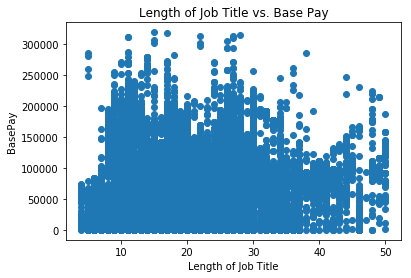

In [28]:
# find the length of job title
data['JobTitle_length'] = data['JobTitle'].map(str).apply(len)

# plot
import matplotlib.pyplot as plt
plt.scatter(data.JobTitle_length, data.BasePay)
plt.xlabel('Length of Job Title')
plt.ylabel('BasePay')
plt.title('Length of Job Title vs. Base Pay')
plt.show()

Base on the scatter plot, for different length of job title, corresponding basepay mostly takes a variety of values. So there is no obvious correlation between the length of job title and base pay.

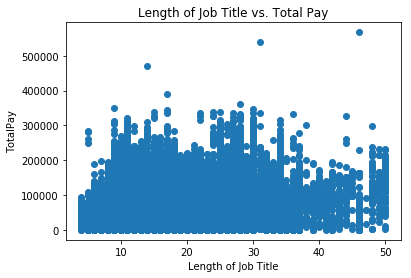

In [29]:
# what about total pay?
y = data[data.TotalPay > 0]
import matplotlib.pyplot as plt
plt.scatter(data.JobTitle_length, data.TotalPay)
plt.xlabel('Length of Job Title')
plt.ylabel('TotalPay')
plt.title('Length of Job Title vs. Total Pay')
plt.show()

It does not seem to have obvious correlation either

#### Show a correlation heatmap of the data

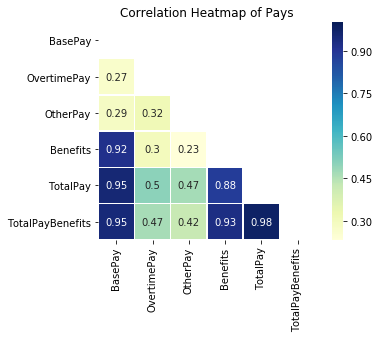

In [30]:
import seaborn as sns

# create subset of data for heatmap, get correlation table
data2 = data[['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']]
table = data2.corr()
table

# create a mask for the upper triangle, where data is repeated
mask = np.zeros_like(table, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# create heatmap
plt.title('Correlation Heatmap of Pays')
sns.heatmap(table, mask = mask, annot = True, linewidths = 0.5, square = True, cmap = "YlGnBu")
plt.show()



Insights: Basepay and benefits are highly correlated. Employees with higher basepay also tends to have higher benefits and total pay. 

#### Largest BasePay by Job

In [31]:
# groupby JobTitle and get the max basepay of each job
results = pd.DataFrame(data.groupby('JobTitle')['BasePay'].max())

# sort from the highest to lowest, get the top one
results.sort_values(by = ['BasePay'], ascending = False).head(1)

,BasePay
JobTitle,
Chief of Police,319275.01


#### Top 30 sectors for SF salary 

In [32]:
# consider totalpay
# all records are SF, no need to filter

results2 = pd.DataFrame(data.groupby('JobTitle')['TotalPay'].max())
results2.sort_values(by = ['TotalPay'], ascending = False).head(30)

,TotalPay
JobTitle,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
CAPTAIN III (POLICE DEPARTMENT),538909.28
Deputy Chief 3,471952.64
Asst Med Examiner,390111.98
"Lieutenant, Fire Suppression",362844.66
Captain 3,350403.41
"Battalion Chief, Fire Suppress",347102.32
Chief Investment Officer,339653.70
Chief of Police,339282.07


#### Is BasePay a good predictor of TotalPay (in this case, just use correlation). Depict a graph with a regression line while also showing their correlation. Interpret the results 

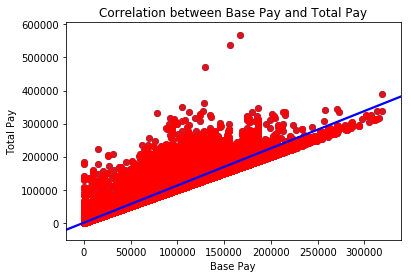

In [33]:
# exclude NA
na1 = data.loc[data['BasePay'].isnull()].index
na2 = data.loc[data['TotalPay'].isnull()].index
data = data.drop(na1).drop(na2)

x = data.BasePay
y = data.TotalPay
# plot
plt.scatter(x,y)
p = sns.regplot(x,y, 
            scatter = True,
            scatter_kws={"color":"r"},
            line_kws={"color":"b"})
p.get_lines()[0].get_xdata()
p.get_lines()[0].get_ydata()
plt.xlabel('Base Pay')
plt.ylabel('Total Pay')
plt.title('Correlation between Base Pay and Total Pay')
plt.show()

In [34]:
# correlation
corr = np.corrcoef(x,y)[1,0]
print('The correlation between BasePay and TotalPay is {0:.4f}'.format(corr))

The correlation between BasePay and TotalPay is 0.9545


In [35]:
# r-squared: corr**2 or
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('R-squared is:{0:.4f}. In other word, {1:.2f}% of TotalPay can be explained by BasePay.'. format(r_value**2, r_value**2*100))

R-squared is:0.9110. In other word, 91.10% of TotalPay can be explained by BasePay.


Therefore, BasePay is a strong predictor for TotalPay. It means sense because TotalPay is equal to BasePay plus OvertimePay, Benefits, and other types of payments. If BasePay is high, TotalPay would be at least equal, or higher.

## Other insights

#### Yearly trend: overall

In [36]:
results = pd.DataFrame(data.groupby('Year')['BasePay'].mean())
results['Count'] = data.groupby('Year')['BasePay'].count()
results

,BasePay,Count
Year,,
2011,63595.956517,36159
2012,65456.016752,36755
2013,69631.069053,36996
2014,66567.914561,38117


In [37]:
results2 = pd.DataFrame(data.groupby('Year')['OvertimePay'].mean())
results2['Count'] = data.groupby('Year')['OvertimePay'].count()
results2

,OvertimePay,Count
Year,,
2011,4531.065429,36159
2012,5024.881965,36755
2013,5368.577324,36996
2014,5402.277180,38117


Number of employees continouesly increased from 2011 to 2014, but the average BasePay dropped from 2013 to 2014. 
<br>
However, overtime pay was continously increasing between 2011 and 2014.


#### Yearly trend: highest paid

In [38]:
# def a function to get highest paid 10 jobs in a specific year
def highestPaid(year):
    yr = pd.DataFrame(data[data['Year'] == year].groupby(['JobTitle'])['TotalPay'].max())
    yr = yr.sort_values(by = ['TotalPay'], ascending = False).head(10)
    return(yr)

highestPaid(2011)

,TotalPay
JobTitle,
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
CAPTAIN III (POLICE DEPARTMENT),538909.28
WIRE ROPE CABLE MAINTENANCE MECHANIC,332343.61
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373.19
ASSISTANT DEPUTY CHIEF II,316285.74
"BATTALION CHIEF, (FIRE DEPARTMENT)",315981.05
DEPUTY DIRECTOR OF INVESTMENTS,307899.46
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",302377.73
"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",299494.17


In [39]:
highestPaid(2012)

,TotalPay
JobTitle,
"Lieutenant, Fire Suppression",362844.66
Captain 3,350403.41
EMT/Paramedic/Firefighter,337204.86
Electronic Maintenance Tech,336393.73
Assistant Deputy Chief 2,327689.78
"Battlion Chief, Fire Suppressi",321883.83
Chief of Police,321552.11
Asst Chf of Dept (Fire Dept),315728.77
"Chief, Fire Department",314759.60


In [40]:
highestPaid(2013)

,TotalPay
JobTitle,
"Battalion Chief, Fire Suppress",347102.32
Chief of Police,339282.07
"Chief, Fire Department",336922.01
Asst Med Examiner,335537.96
Asst Chf of Dept (Fire Dept),333888.32
Assistant Deputy Chief 2,326376.37
Senior Physician Specialist,322886.84
"Lieutenant, Fire Suppression",320375.79
"Dep Dir for Investments, Ret",315572.01


In [41]:
highestPaid(2014)

,TotalPay
JobTitle,
Deputy Chief 3,471952.64
Asst Med Examiner,390111.98
Chief Investment Officer,339653.70
"Battalion Chief, Fire Suppress",335484.96
Asst Chf of Dept (Fire Dept),329390.54
Chief of Police,326716.76
"Chief, Fire Department",326233.44
Commander 3,322143.10
Senior Physician Specialist,311650.36


The highest paid 10 jobs across 2011-2014 is not very consistent in ranking. Most jobs appears in multiple years, but ranked differently. 
<br>
Some jobs only apprears in one year but does not apprears in any other years, such as Electronic Maintenance Tech, Commander 3, and Asst Med Examiner.
<br>
Asst Chf of Dept (Fire Dept) was paid a little more than $900 higher than that of Chief, Fire Department.


#### Distribution of basepay and totalpay

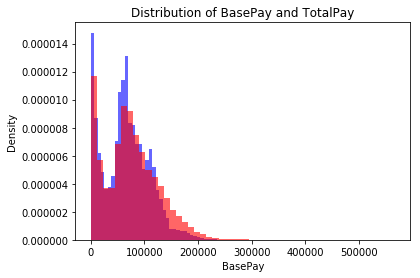

In [42]:
plt.hist(data['BasePay'].dropna().values, bins = 50, density = True, color = 'b', alpha = 0.6)
plt.hist(data['TotalPay'].dropna().values, bins = 50, density = True, color = 'r', alpha = 0.6)
plt.xlabel('BasePay')
plt.ylabel('Density')
plt.title('Distribution of BasePay and TotalPay')
plt.show()

BasePay and TotalPay seems to have bimodal distribution, with one of the peaks close to zero.

#### What kinds of jobs have zero BasePay

In [43]:
zero_basepay = data[data['BasePay'] == 0].groupby('JobTitle').count()
zero_basepay.sort_values(by = ['BasePay'], ascending = False).head(10)['EmployeeName']

JobTitle
Transit Operator             61
TRANSIT OPERATOR             59
Police Officer 3             49
Registered Nurse             35
Special Nurse                34
Senior Eligibility Worker    19
Custodian                    17
REGISTERED NURSE             16
Police Officer               15
Deputy Sheriff               14
Name: EmployeeName, dtype: int64

## Bonus

#### Is there a strong correlation between vowel count in a name and average salary? 

In [50]:
vowels = {"a", "e", "i", "o", "u", "A", "E", "I", "O", "U"}
s = pd.Series() # create an empty series to store vowel counts

import re
for i in range(len(data)):
    name = data.iloc[i]['EmployeeName'] # get name
    name = re.sub(r'\d+', '', str(name)) # clean name string
    counts = 0
    # count number of vowels
    for char in name:
        if char in vowels:
            counts += 1
    new = pd.Series(counts, index = [i]) # put new element to series formate
    s = s.append(new) # add ith count to the s
print(s)

0         5
1         4
2         5
3         4
4         4
5         5
6         4
7         4
8         5
9         7
10        4
11        6
12        5
13        3
14        4
15        6
16        2
17        5
18        2
19        4
20        4
21        4
22        6
23        2
24        4
25        3
26        3
27        4
28        4
29        5
         ..
147997    5
147998    6
147999    4
148000    7
148001    5
148002    7
148003    6
148004    6
148005    4
148006    3
148007    8
148008    2
148009    4
148010    6
148011    5
148012    4
148013    6
148014    4
148015    5
148016    5
148017    5
148018    4
148019    8
148020    6
148021    3
148022    2
148023    5
148024    5
148025    4
148026    4
Length: 148027, dtype: int64


In [51]:
# add to the dataframe
data['VowelCount'] = s
data.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,JobTitle_length,VowelCount
Id,,,,,,,,,,,,,,
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,46,4.0
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,31,5.0
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,31,4.0
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,36,4.0
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,44,5.0


In [52]:
vowel_n_salary = pd.DataFrame(data.groupby('VowelCount')['TotalPay'].mean())
vowel_n_salary = vowel_n_salary.reset_index()[1:][:]
vowel_n_salary['Count'] = data.groupby('VowelCount')['TotalPay'].count()
vowel_n_salary

,VowelCount,TotalPay,Count
1,2.0,75793.464780,245
2,3.0,78882.939744,5709
3,4.0,77174.468246,21659
4,5.0,75745.185773,37780
5,6.0,73697.757173,37429
6,7.0,70583.749684,24597
7,8.0,68838.438318,12564
8,9.0,64959.082777,4775
9,10.0,62496.378693,1732
10,11.0,65437.421909,597


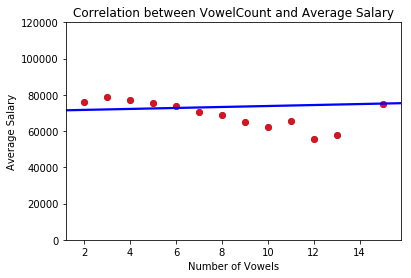

In [53]:
x = vowel_n_salary.VowelCount
y = vowel_n_salary.TotalPay

# create plot
plt.scatter(x,y)
p = sns.regplot(x, y, scatter = True, ci = None,
                scatter_kws={"color":"r"}, line_kws={"color":"b"})
p.get_lines()[0].get_xdata()
p.get_lines()[0].get_ydata()
plt.xlabel('Number of Vowels')
plt.ylabel('Average Salary')
plt.title('Correlation between VowelCount and Average Salary')
plt.ylim(0,120000)
plt.show()

In [54]:
# correlation
np.corrcoef(x,y)[1,0]

0.067283663744627215

There is a very weak correlation between vowel count in a name and average salary. The correlation is only 0.067.
<br>
Any correlation between number of vowels in the name and salary is coincidence, and it brings few business meaning.